# Predict Loan Eligibility using Machine Learning Models.

I am pleased to introduce our loan approval prediction project, which aims to leverage machine learning to enhance the efficiency and accuracy of our loan application evaluation process. By analyzing various applicant attributes, we seek to develop a predictive model that can determine the likelihood of loan repayment or default.
Through this project, we anticipate several benefits, including improved loan approval decisions, reduced risk of default, and streamlined operations.

# DATASET INFORMATION

This dataset is named Loan Prediction Dataset data set. The dataset contains a set of 613 records under 13 attributes:

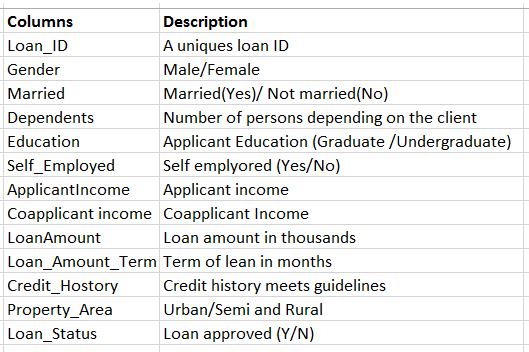

# OBJECTIVE OF THE PROJECT

The main objective of the loan approval prediction project is to leverage machine learning techniques to improve the loan application evaluation process and make informed decisions regarding loan approvals for individual applicants. The project aims to achieve the following specific objectives:

1.Increase Accuracy: 

Develop a predictive model that can accurately assess the creditworthiness of loan applicants based on various factors such as income level, employment history, credit score, loan amount, and repayment history. 

2.Enhance Efficiency: 
    
Streamline the loan approval process by automating certain tasks and reducing the time taken for evaluation.

3.Optimize Risk Assessment: 

Improve risk assessment capabilities by analyzing historical loan data and identifying patterns and relationships between different variables. The objective is to enhance the understanding of risk factors and develop a more comprehensive risk assessment framework that aligns with the specific needs of the institution.

4.Ensure Fairness and Transparency: 

Pay careful attention to fairness and ethics by mitigating potential biases in the loan approval process. The project aims to identify and address any discriminatory practices by thoroughly examining the impact of various features on loan decisions and ensuring that all applicants are treated fairly and equitably.

# Table of Contents


1.Getting the system ready and loading the data

2.Understanding the data

3.Exploratory Data Analysis (EDA)

    i. Univariate Analysis
    ii. Bivariate Analysis
    
4.Missing value and outlier treatment

5.Model Building

# 1.Getting the system ready and loading the data

# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('loan data.csv')

In [3]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# 2.Understanding the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


The ApplicantIncome,Co-ApplicantIncome,LoanAmount column exhibits clear outliers, as there is a significant difference between the mean income of individuals and the maximum income value.

In [6]:
data.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


The dataset shows an imbalance based on gender, loan status, and employability factors.

In [7]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

# 3.Exploratory Data Analysis (EDA)

#    i. Univariate Analysis

Univariate analysis is commonly performed as a preliminary step in data exploration and serves as a foundation for more advanced analyses. It helps to understand the variable's range, identify outliers or missing values, detect patterns, and make initial observations about its potential relationship with other variables.

C:\Users\Subhodwip\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


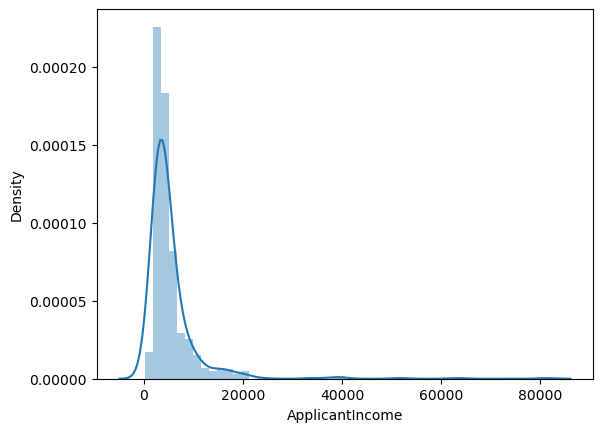

C:\Users\Subhodwip\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


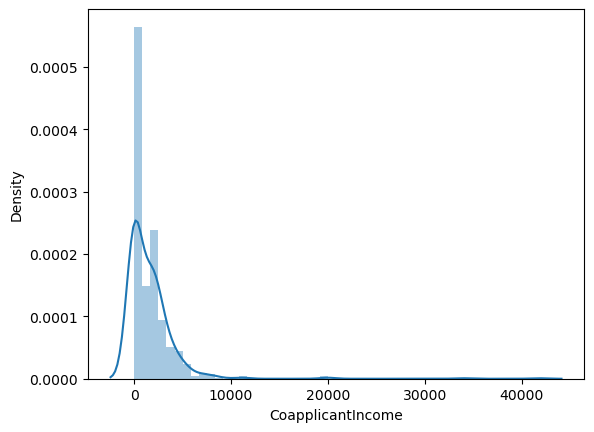

C:\Users\Subhodwip\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


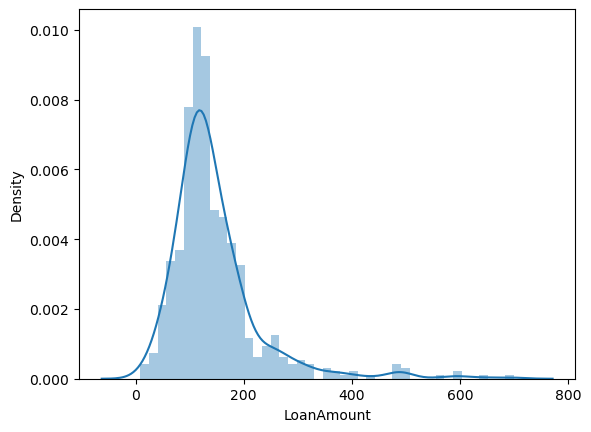

In [8]:
sns.distplot(data['ApplicantIncome'])
plt.show()
sns.distplot(data['CoapplicantIncome'])
plt.show()
sns.distplot(data['LoanAmount'])
plt.show()

All of the cases the data shows positively skewed distribution for those piticular columns.positively skewed distribution, also known as a right-skewed distribution, is a type of distribution where the majority of the data points are concentrated on the left side, and the tail extends towards the right side. In this distribution, the mean is typically greater than the median, and the majority of the data values are lower than the mean.
When working with a positively skewed distribution, it is important to consider the potential impact of outliers on statistical measures like the mean. Outliers on the right side of the distribution can inflate the mean, making it less representative of the typical values. In such cases, alternative measures of central tendency such as the median might be more appropriate.

.

.

.

# ii. Bivariate Analysis


Bivariate analysis is the statistical analysis that examines the relationship between two variables to understand their association, correlation, or dependency.

Let's assume some hypothesis:

1.Individuals with higher incomes are more likely to have a greater probability of loan approval.

2.Loan applicants who have a history of repaying previous debts have increased chances of loan approval.

3.Loan approval rates tend to be higher for applicants with lower monthly repayment amounts for the loan.

4.Loan approval rates tend to be higher for applicants with lower monthly repayment amounts for the loan.The approval of a loan should consider the loan amount as a factor. If the loan amount is lower, the likelihood of approval should be higher.

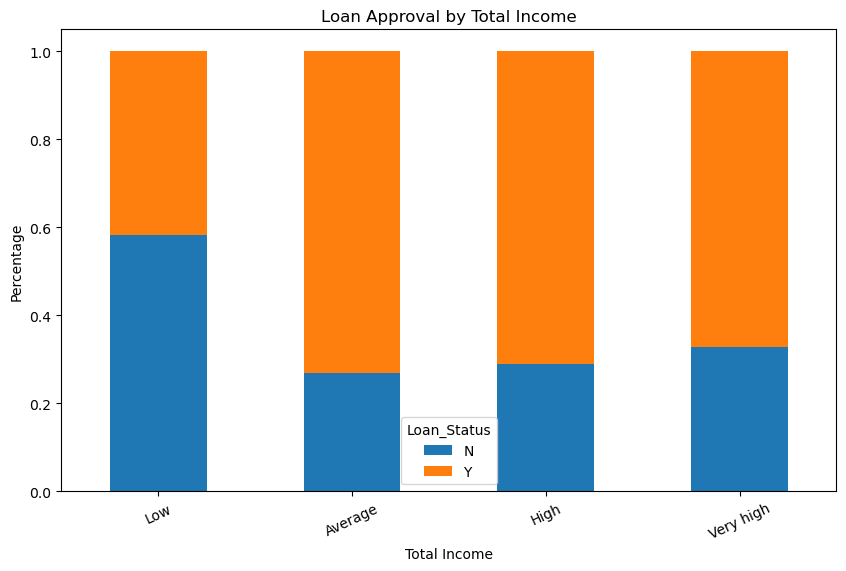

In [9]:
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']
bins = [0,2500,4000,6000,81000]
group = ['Low', 'Average', 'High', 'Very high']
data['Total_Income_bin'] = pd.cut(data['Total_Income'], bins, labels=group)
Total_Income_bin = pd.crosstab(data['Total_Income_bin'], data['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Total Income')
plt.ylabel('Percentage')
plt.title('Loan Approval by Total Income')
plt.xticks(rotation=25)
plt.show()

We can see that Proportion of loans getting approved for applicants having low Total_Income is very less compared to that of applicants with Average, High & Very High Income.

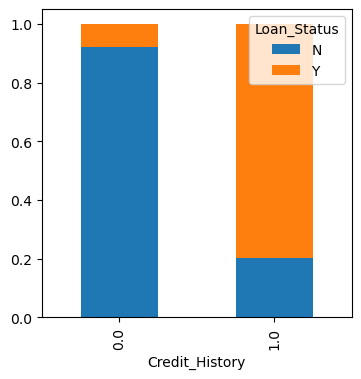

In [10]:
Credit_History=pd.crosstab(data['Credit_History'],data['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

Based on the available data and analysis, there is a notable trend indicating that individuals who have a credit history score of 1 are more likely to have their loan applications approved. A credit history score of 1 typically indicates a good credit history, implying that the individual has a history of timely repayments and responsible financial behavior.

In [11]:
data['EMI']=data['LoanAmount']/data['Loan_Amount_Term']

C:\Users\Subhodwip\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EMI', ylabel='Density'>

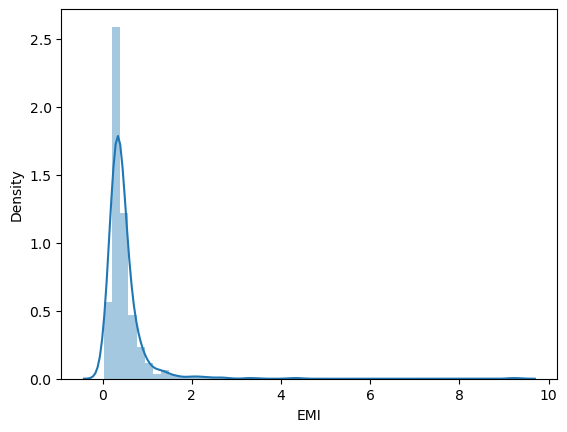

In [12]:
sns.distplot(data['EMI'])

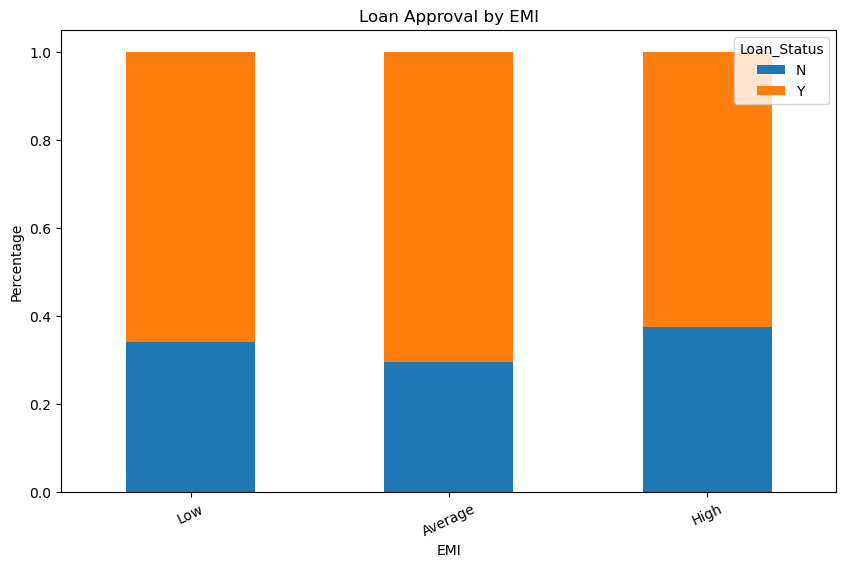

In [13]:
bins = [0,.25,2,9]
group = ['Low', 'Average', 'High']
data['EMI'] = pd.cut(data['EMI'], bins, labels=group)
LoanAmount_bin = pd.crosstab(data['EMI'], data['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('EMI')
plt.ylabel('Percentage')
plt.title('Loan Approval by EMI')
plt.xticks(rotation=25)
plt.show()

Applicants who have lower & average monthly repayment amounts for the loan tend to have higher rates of loan approval.

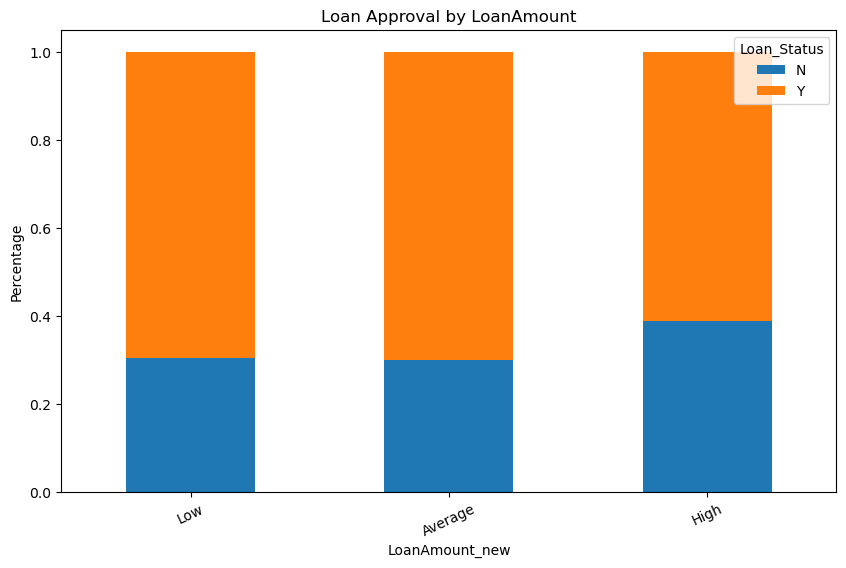

In [23]:
bins = [0,100,200,700]
group = ['Low', 'Average', 'High']
data['LoanAmount_new'] = pd.cut(data['LoanAmount'], bins, labels=group)
LoanAmount_bin = pd.crosstab(data['LoanAmount_new'], data['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('LoanAmount_new')
plt.ylabel('Percentage')
plt.title('Loan Approval by LoanAmount')
plt.xticks(rotation=25)
plt.show()

The analysis reveals that the likelihood of loan approval is higher for low and average loan amounts compared to high loan amounts. This finding aligns with our hypothesis, suggesting that there is a positive correlation between loan approval and smaller loan amounts.

# 4.Missing value and outlier treatment

# CHECKING NULL VALUES

In [15]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Total_Income          0
Total_Income_bin      0
EMI                  37
LoanAmount_new       22
dtype: int64

Credit history has highest no of null values followed by self employed

# FILLING NULL VALUES

The approach for handling null values in numerical variables involves imputing them with the mean, while for categorical variables, the null values are filled with the mode.

In [16]:
data.dtypes

Loan_ID                object
Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area          object
Loan_Status            object
Total_Income          float64
Total_Income_bin     category
EMI                  category
LoanAmount_new       category
dtype: object

In [17]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income', 'Total_Income_bin', 'EMI', 'LoanAmount_new'],
      dtype='object')

categorical value filled with mode

In [29]:
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']=data['Married'].fillna(data['Married'].mode()[0])
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['EMI'] = data['EMI'].fillna(data['EMI'].mode()[0])

Numerical value filled with median

In [28]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].median())

In [30]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_Income         0
Total_Income_bin     0
EMI                  0
LoanAmount_new       0
dtype: int64

# OUTLIERS DETECTION & HANDLING

C:\Users\Subhodwip\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Subhodwip\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Subhodwip\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


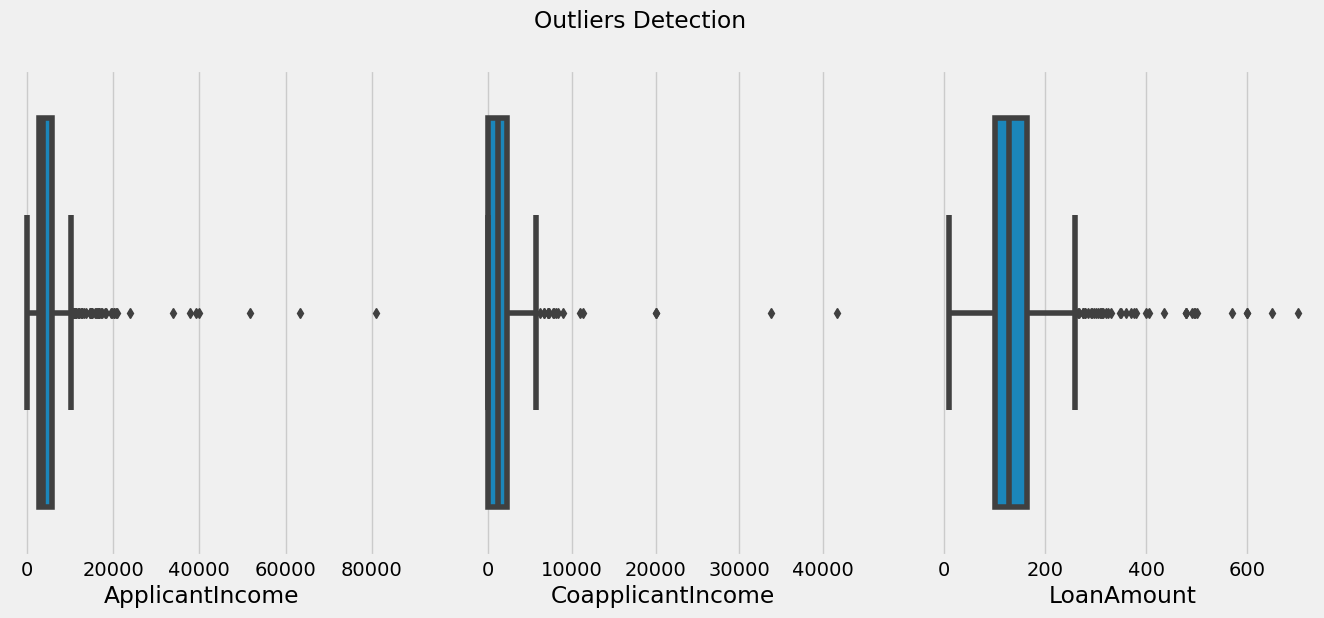

In [31]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 6)

plt.subplot(1, 3, 1)
sns.boxplot(data['ApplicantIncome'])

plt.subplot(1, 3, 2)
sns.boxplot(data['CoapplicantIncome'])

plt.subplot(1, 3, 3)
sns.boxplot(data['LoanAmount'])

plt.suptitle("Outliers Detection")
plt.show()

As there are very few no of outliers present in the 3 cases we simply delete this dataset.

Removing the no of observation where the applicant income is more than 25k

In [32]:
print("Before Removing the outliers", data.shape)
data = data[data['ApplicantIncome']<25000]
print("After Removing the outliers", data.shape)

Before Removing the outliers (614, 17)
After Removing the outliers (607, 17)


Removing the no of observation where the co-applicant income is more than 10k

In [33]:
print("Before Removing the outliers", data.shape)
data = data[data['CoapplicantIncome']<10000]
print("After Removing the outliers", data.shape)

Before Removing the outliers (607, 17)
After Removing the outliers (601, 17)


Removing the no of observation where the Loan amount is more than 400

In [34]:
print("Before Removing the outliers", data.shape)
data = data[data['LoanAmount']<400]
print("After Removing the outliers", data.shape)

Before Removing the outliers (601, 17)
After Removing the outliers (590, 17)


After removing all the outliers, a total of 590 observations remain in the dataset.

# ANALYSIS

After removing all the outliers, a total of 590 observations remain in the dataset.check wheter the data is now normally distributed or not

C:\Users\Subhodwip\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Subhodwip\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Subhodwip\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

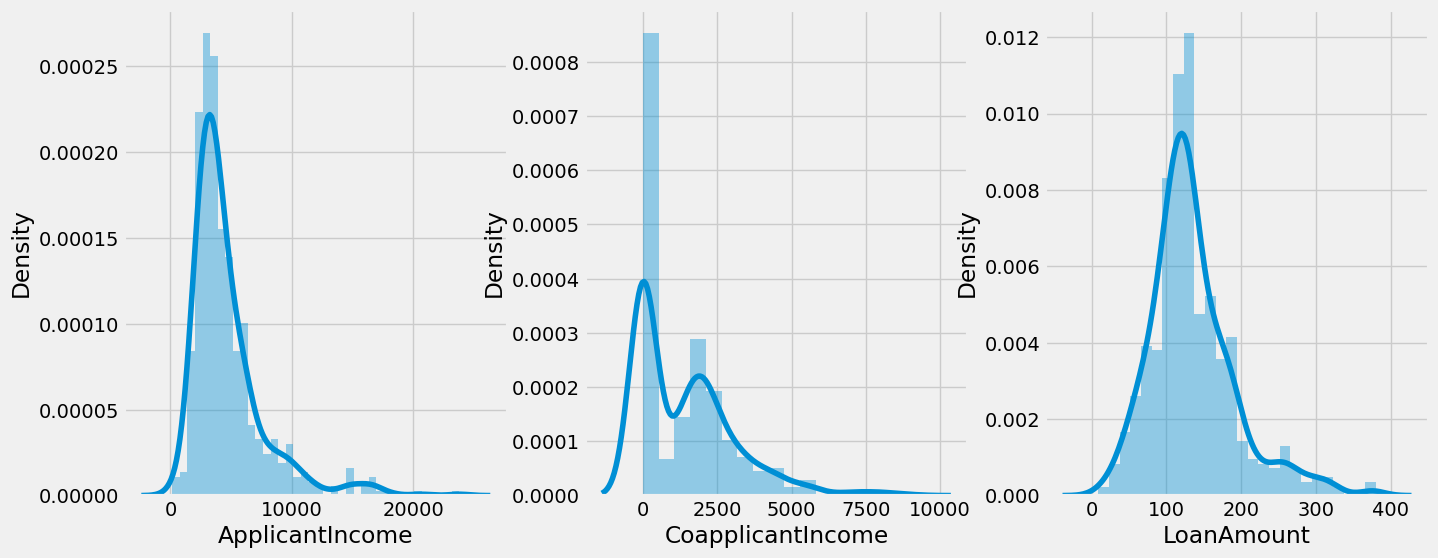

In [36]:
plt.subplot(1,3,1)
sns.distplot(data['ApplicantIncome'])

plt.subplot(1,3,2)
sns.distplot(data['CoapplicantIncome'])

plt.subplot(1,3,3)
sns.distplot(data['LoanAmount'])

Applicant income and co-applicant income do not exhibit a normal distribution. To achieve a more normal distribution, a log Normal transformation is applied to the income variables.

C:\Users\Subhodwip\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Subhodwip\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Subhodwip\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


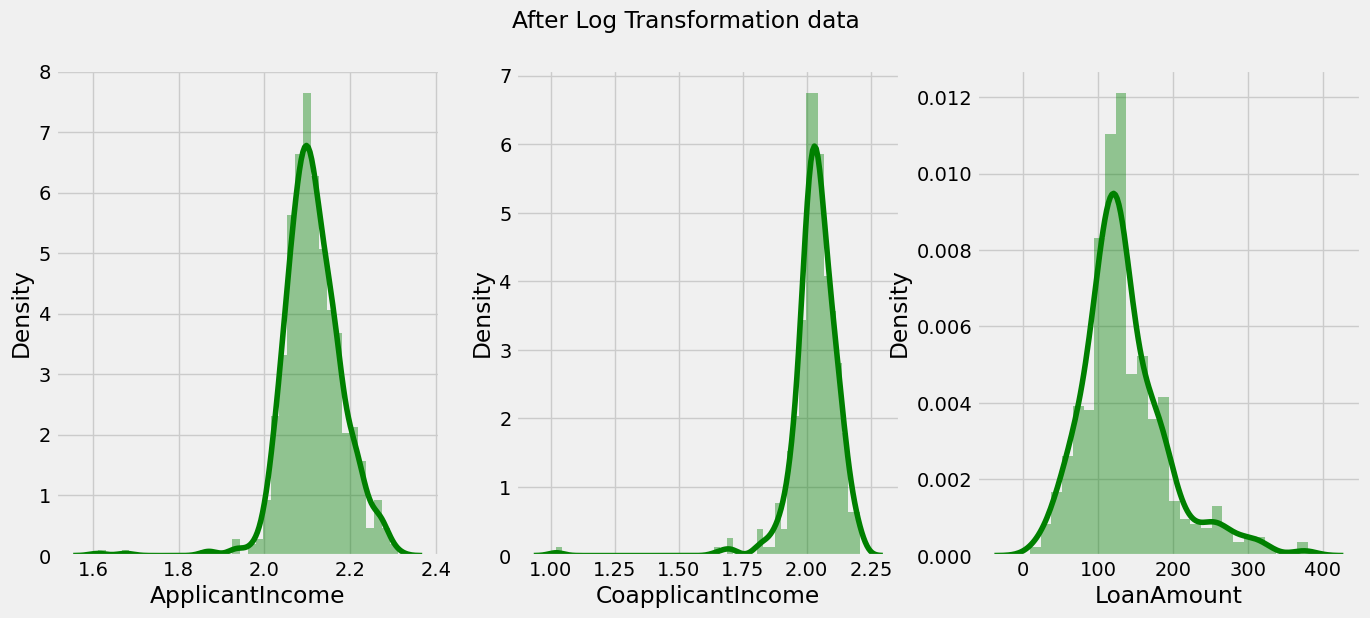

In [38]:
data['ApplicantIncome']=np.log(data['ApplicantIncome'])
data['CoapplicantIncome']=np.log(data['CoapplicantIncome'])

plt.subplot(1, 3, 1)
sns.distplot(data['ApplicantIncome'], color = 'green')

plt.subplot(1, 3, 2)
sns.distplot(data['CoapplicantIncome'], color = 'green')

plt.subplot(1, 3, 3)
sns.distplot(data['LoanAmount'], color = 'green')

plt.suptitle("After Log Transformation data")
plt.show()

The data is now normally distributed.

# FINDINGS NUMERICALS AND CATEGORICAL DATA FROM THE DATASET

In [43]:
num=data.select_dtypes('number').columns.tolist()
cat=data.select_dtypes('object').columns.tolist()

In [46]:
num

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Total_Income']

In [47]:
cat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

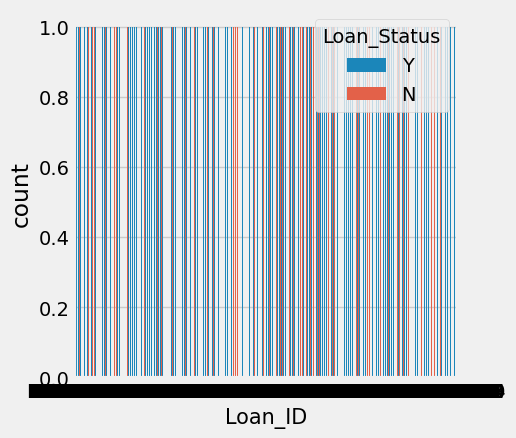

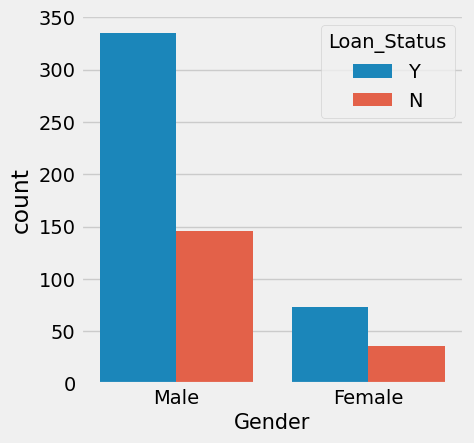

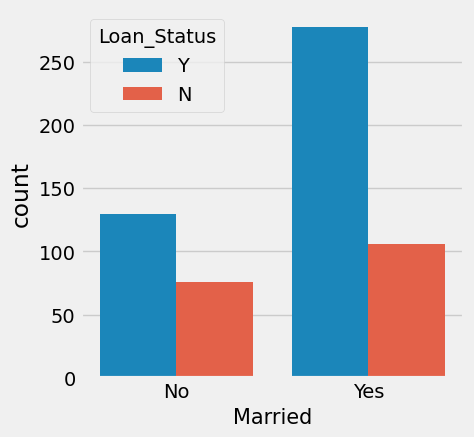

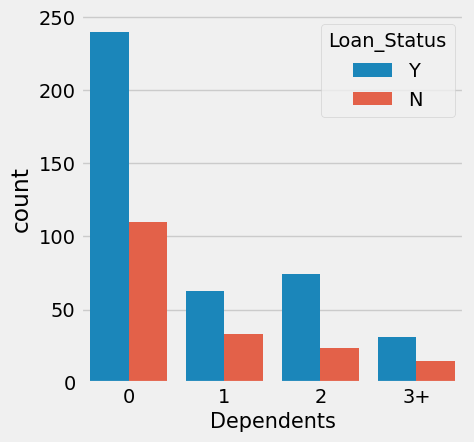

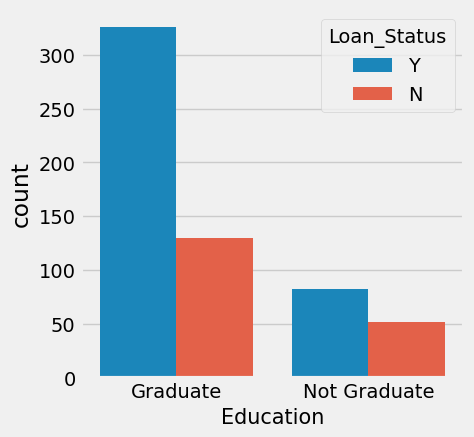

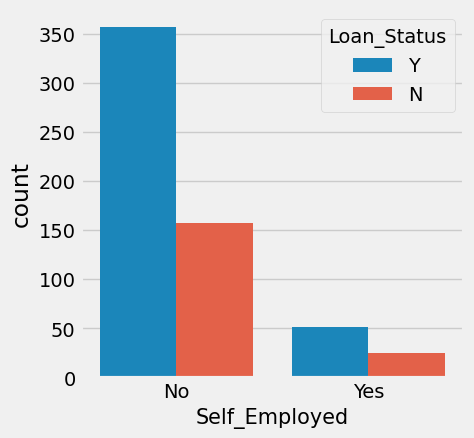

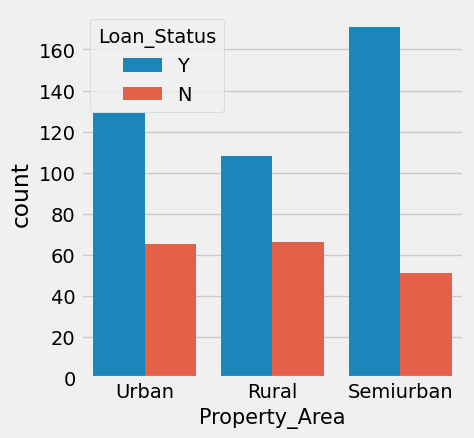

In [54]:
for i in cat[:-1]:
    plt.figure(figsize = (15,10))
    plt.subplot(2,3,3)
    sns.countplot(x =i, hue = 'Loan_Status', data = data)
    plt.xlabel(i, fontsize = 15)


In [55]:
# Plt Categporial with Target Data

print(pd.crosstab(data['Loan_Status'], data['Married']))

Married       No  Yes
Loan_Status          
N             76  106
Y            130  278


In [56]:
print(pd.crosstab(data['Loan_Status'], data['Education']))

Education    Graduate  Not Graduate
Loan_Status                        
N                 130            52
Y                 326            82


In [57]:
print(pd.crosstab(data['Loan_Status'], data['Property_Area']))

Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 66         51     65
Y                108        171    129


In [59]:
print(pd.crosstab(data['Loan_Status'], data['Self_Employed']))

Self_Employed   No  Yes
Loan_Status            
N              157   25
Y              357   51


# Data preparation 

Data preprocessing and preparation are essential steps before running a model.

In [60]:
data.select_dtypes('object').head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


There is no relation between loan id and loan status so we simply remove the column.

In [62]:
data=data.drop(['Loan_ID'],axis=1)

In [63]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_bin,EMI,LoanAmount_new
0,Male,No,0,Graduate,No,2.160333,NaN,128.0,360.0,1.0,Urban,Y,5849.0,High,Average,Average
1,Male,Yes,1,Graduate,No,2.131810,1.990411,128.0,360.0,1.0,Rural,N,6091.0,Very high,Average,Average
2,Male,Yes,0,Graduate,Yes,2.080237,NaN,66.0,360.0,1.0,Urban,Y,3000.0,Average,Low,Low
3,Male,Yes,0,Not Graduate,No,2.061368,2.049700,120.0,360.0,1.0,Urban,Y,4941.0,High,Average,Average
4,Male,No,0,Graduate,No,2.163267,NaN,141.0,360.0,1.0,Urban,Y,6000.0,High,Average,Average


# Transform all the categorical variables with One hat encoding

In [65]:
data['Gender'] = data['Gender'].replace(('Male', 'Female'),(1,0))
data['Married'] = data['Married'].replace(('Yes', 'No'),(1,0))
data['Education'] = data['Education'].replace(('Graduate', 'Not Graduate'),(1,0))
data['Self_Employed'] = data['Self_Employed'].replace(('Yes', 'No'),(1,0))
data['Loan_Status'] = data['Loan_Status'].replace(('Y', 'N'),(1,0))

In [66]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_bin,EMI,LoanAmount_new
0,1,0,0,1,0,2.160333,NaN,128.0,360.0,1.0,Urban,1,5849.0,High,Average,Average
1,1,1,1,1,0,2.131810,1.990411,128.0,360.0,1.0,Rural,0,6091.0,Very high,Average,Average
2,1,1,0,1,1,2.080237,NaN,66.0,360.0,1.0,Urban,1,3000.0,Average,Low,Low
3,1,1,0,0,0,2.061368,2.049700,120.0,360.0,1.0,Urban,1,4941.0,High,Average,Average
4,1,0,0,1,0,2.163267,NaN,141.0,360.0,1.0,Urban,1,6000.0,High,Average,Average


In [73]:
data['Property_Area'] = data['Property_Area'].replace(('Urban', 'Semiurban','Rural'),(1,1,0))
data['Dependents'] = data['Dependents'].replace(('0', '1','2', '3+'),(0,1,1,1))
data['EMI'] = data['EMI'].replace(('Low', 'Average','High'),(0,1,1))
data['Total_Income_bin'] = data['Total_Income_bin'].replace(('Low', 'Average','High','Very high'),(0,0,1,1))
data['LoanAmount_new'] = data['LoanAmount_new'].replace(('Low', 'Average','High'),(0,1,1))

In [74]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_bin,EMI,LoanAmount_new
0,1,0,0,1,0,2.160333,NaN,128.0,360.0,1.0,1,1,5849.0,1,1,1
1,1,1,1,1,0,2.131810,1.990411,128.0,360.0,1.0,0,0,6091.0,1,1,1
2,1,1,0,1,1,2.080237,NaN,66.0,360.0,1.0,1,1,3000.0,0,0,0
3,1,1,0,0,0,2.061368,2.049700,120.0,360.0,1.0,1,1,4941.0,1,1,1
4,1,0,0,1,0,2.163267,NaN,141.0,360.0,1.0,1,1,6000.0,1,1,1


# Definig Explanatory variable & Target variable

In [76]:
y = data['Loan_Status']
x = data.drop(['Loan_Status'], axis = 1)

In [77]:
x.shape,y.shape

((590, 15), (590,))

# Handle Imbalance dataset

An imbalanced dataset refers to a dataset in which the distribution of target classes is highly skewed, with one class having significantly more instances than the others. This can lead to poor model performance, as the model may be biased towards the majority class and struggle to effectively predict the minority class.
To handle imbalance dataset i use Resampling Tehnique SMOTE (Synthetic Minority Over-sampling Technique).It involves creating synthetic instances of the minority class by interpolating new examples between existing minority class instances.

In [79]:
pip install -U imbalanced-learn


     -------------------------------------- 226.0/226.0 kB 1.5 MB/s eta 0:00:00
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [80]:
from imblearn.over_sampling import SMOTE

In [93]:
x_rasmple, y_rasmple = SMOTE().fit_resample(x, y.values.ravel())

In [94]:
print(x_rasmple.shape)
print(y_rasmple.shape)

(816, 15)
(816,)


# Train test split

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
x_train, x_test, y_train,y_test = train_test_split(x_rasmple, y_rasmple, test_size = 0.2, random_state = 0)

In [97]:
x_train.shape,y_train.shape

((652, 15), (652,))

In [98]:
x_test.shape,y_test.shape

((164, 15), (164,))

# 5.Model Building

As we understand by seeing the target variable that  this is problem of binary classification,where based upon the independent variable my model model is going to to predict whether to give loan or not.We use Logistic regression model in this case. It is a simple and widely used algorithm that models the probability of the input belonging to each class using a logistic function.

# Logistic Regression

In [99]:
from sklearn.linear_model import LogisticRegression

In [100]:
from sklearn.metrics import accuracy_score

In [115]:
LR = LogisticRegression()
LR.fit(x_train, y_train)

C:\Users\Subhodwip\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [120]:
y_pred = LR.predict(x_test)

In [122]:
print("Traning Accuracy", LR.score(x_train, y_train))
print("Test Accuracy", LR.score(x_test, y_test))

Traning Accuracy 0.7730061349693251
Test Accuracy 0.7804878048780488


In [123]:
from sklearn.metrics import classification_report

In [124]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.63      0.74        81
           1       0.72      0.93      0.81        83

    accuracy                           0.78       164
   macro avg       0.81      0.78      0.77       164
weighted avg       0.81      0.78      0.78       164



In [125]:
print("Our Model Accuracy is",accuracy_score(y_pred, y_test) )

Our Model Accuracy is 0.7804878048780488


The model accuracy is calculated to be 0.7804878048780488, which means that our model correctly predicts the outcome of the target variable for approximately 78.05% of the instances in the dataset. This indicates that the model is performing reasonably well in classifying the data points and making accurate predictions. However, it's important to note that accuracy alone may not provide a complete picture of the model's performance, and it's advisable to consider other evaluation metrics and conduct further analysis to assess the model's effectiveness.

In [126]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income', 'Total_Income_bin', 'EMI', 'LoanAmount_new'],
      dtype='object')

In [133]:
model_pred = np.array([[1,1,1, 1, 1,3924, 1733, 148.0, 360, 1, 1,1,1,1,0 ]])

In [134]:
prediction = LR.predict(model_pred)
print(prediction[0])

0


C:\Users\Subhodwip\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# DECESION TREE

This algorithm builds a tree-like model where each internal node represents a feature, each branch represents a decision rule, and each leaf node represents the outcome or class label.

In [135]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [137]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [138]:
clf = DecisionTreeClassifier()

In [139]:
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [140]:
y_pred = clf.predict(x_test)

In [141]:
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.8050847457627118


In this case, the accuracy score suggests that our model correctly predicted the target variable for about 80.51% of the samples.

# Random forest

Random Forest is a popular machine learning algorithm that is used for both classification and regression tasks. It is an ensemble learning method that combines multiple decision trees to make predictions.
The key idea behind Random Forest is that by combining multiple decision trees, the errors and biases of individual trees can be minimized, resulting in a more robust and accurate model. It helps to reduce overfitting and improve generalization by reducing the variance in the predictions.

In [142]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [143]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [144]:
rf_classifier = RandomForestClassifier()

In [145]:
rf_classifier.fit(x_train, y_train)

RandomForestClassifier()

In [146]:
predictions = rf_classifier.predict(x_test)

In [147]:
accuracy = accuracy_score(y_test, predictions)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.7796610169491526


In this case, the accuracy score suggests that our model correctly predicted the target variable for about 77.96% of the samples.


Among the three models, namely Random Forest, Logistic Regression, and Decision Tree, the Decision Tree model provides the best results in terms of predictive accuracy and performance.